In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('notebooks_final/08-Linear-Regression-Models/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
X = df.drop('sales', axis=1)
y = df['sales']

In [28]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_features = polynomial_converter.fit_transform(X)
poly_features.shape

(200, 9)

In [29]:
type(poly_features)

numpy.ndarray

In [26]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [36]:
# 3 Original Terms: TV, Radio, Newspaper
# 3 Squared Terms: TV**2 =52946.009999999995, Radio**2 = 1428.8399999999997, Newspaper**2 = 4788.64
# 3 Interaction Terms: TV * Radio, TV * Newspaper, Radio * Newspaper
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [38]:
from sklearn.model_selection import train_test_split    # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
test_predictions = model.predict(X_test)
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MAE = mean_absolute_error(y_test, test_predictions)
MAE

0.4896798044803488

In [51]:
MSE = mean_squared_error(y_test, test_predictions)
MSE

0.44175055104033534

In [54]:
RMSE = np.sqrt(MSE)
RMSE

0.6646431757268974

From linear Regression we get:
MAE = 1.213
RMSE = 1.516

The polynomial regression model performs better than the linear regression model.

* Create the different order polynomial;
* Split poly feature train/test;
* fit on training data;
* Store the RMSE for both the train and test;
* Plot the results (error vs order of polynomial).

In [57]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

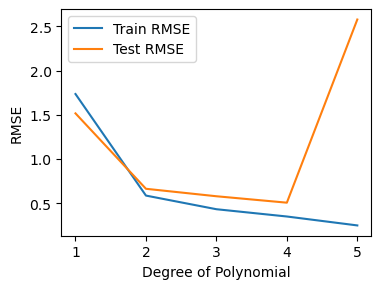

In [67]:
plt.figure(figsize=(4, 3), dpi=100)
plt.plot(range(1, 6), train_rmse_errors[:5], label='Train RMSE')
plt.plot(range(1, 6), test_rmse_errors[:5], label='Test RMSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.legend()

Optimal degree of polynomial is 2 or 3 (4 seems too much).

In [68]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)
final_model = LinearRegression()
fully_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(fully_converted_X, y)


LinearRegression()

In [70]:
from joblib import dump, load
dump(final_model, 'final_polynomial_regression_model.joblib')
dump(final_poly_converter, 'final_polynomial_regression_converter.joblib')

['final_polynomial_regression_converter.joblib']

In [71]:
loaded_converter = load('final_polynomial_regression_converter.joblib')
loaded_model = load('final_polynomial_regression_model.joblib')


In [73]:
# TV=149, Radio=22, Newspaper=12
campaign = [[149, 22, 12]]
transformed_data = loaded_converter.fit_transform(campaign)

In [74]:
loaded_model.predict(transformed_data)


array([14.64501014])